In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# If you want to run the code, download data from here: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
df = pd.read_csv('mnist_train.csv')

In [3]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels_df = df['label']
df = df.drop('label',axis =1)

In [5]:
labels_df.head(5)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [6]:
df.head(5)

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print (df.shape)
print (labels_df.shape)

(60000, 784)
(60000,)


3


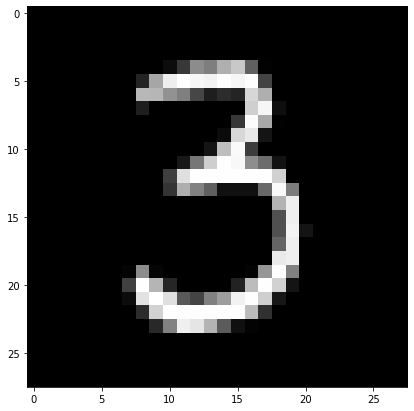

In [8]:
plt.figure (figsize=(7,7))
index = 50

grid_data = np.reshape(df.iloc[index].to_numpy(), (28,28))
print (labels_df[index])
plt.imshow(grid_data,interpolation='none',cmap='gray')
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [10]:
std_df = scalar.fit_transform(df)

## I- Using the Mathematical Method

#### 01- first get the matrix covariance by multiplying the matrix to itslef `np.matmul()`

In [11]:
# we will start with transposed matrix which have dimentions of d*n 
# and multipy it with original matrix which have shape of n*d
# so the resulting matrix (Covariance matrix) have dimentions of d*d
# d is the number of features, n number of instances in the df
covariance_matrix = np.matmul(std_df.T,std_df)
print (covariance_matrix.shape) #should be d*d

(784, 784)


#### 02- Get Eigen Vectors and Eigen Values of the Covariance Matrix `eigh()`

In [12]:
from scipy.linalg import eigh

# use the eigh method to get the eigen vectors and eigen values of the covariance matrix
# note that , I used 'eigvals' to get only last 2 eigen vectors and values
# I try to condese the dataframe to only 2 features to visualize it
# 782,783 are the last vectors as they are sorted 'ascending', the most important feature are at the end

values,vectors = eigh(covariance_matrix , eigvals=(782,783))
print (vectors.shape)

(784, 2)


#### 03- `Matrix Transformation` Transforming the std_df to the new coordinates.

In [13]:
#convert it to (2,784) to be easly used later
# vectors= vectors.T
# print (f'updated vectors shape is {vectors.shape}')
# let's now tranform the data to its new coordinates
data_on_new_coordinates = np.matmul (std_df,vectors)

#### 04- Converting it into a DataFrame and add Labels to it

In [14]:
# Adding the labels to the Dataframe
new_df = pd.DataFrame(data=data_on_new_coordinates,columns=['First_componenet','Second_componenet'])
print (new_df.head())
print ('*----------------------------------*')
new_df['label'] = labels_df
print (new_df.head())
print ('*----------------------------------*')
print (new_df.shape)

   First_componenet  Second_componenet
0         -4.814790          -0.922159
1         -7.754403           8.708977
2          9.431338           2.328389
3         -3.746318          -6.582173
4          3.133297          -5.183251
*----------------------------------*
   First_componenet  Second_componenet  label
0         -4.814790          -0.922159      5
1         -7.754403           8.708977      0
2          9.431338           2.328389      4
3         -3.746318          -6.582173      1
4          3.133297          -5.183251      9
*----------------------------------*
(60000, 3)


#### 05- Now we have the two principle component, let's visualize it 

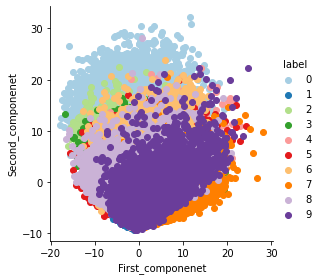

In [15]:
import seaborn as sns
g = sns.FacetGrid (data=new_df, hue='label',height=4,palette='Paired')
g.map(plt.scatter,'First_componenet','Second_componenet').add_legend()
plt.show()

## II- Using Scikit Learn `PCA()` method

#### 01- import and Intialize `PCA`

In [16]:
# import PCA from sklearn.decomposition
from sklearn.decomposition import PCA
# initialize PCA and select 2 Principle components to compare it with the above
pca = PCA(n_components=2)

#### 02- Fit and Transform your data `pca.fit_transform()`

In [17]:
pca_data = pca.fit_transform(std_df)
print (f'PCA DataFrame Shape is {pca_data.shape}')

PCA DataFrame Shape is (60000, 2)


#### 03- Creating the DataFrame and Visualizing your Data

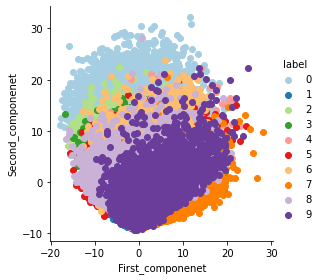

In [18]:
# creting the Data Frame and notice that I replaced the order of the two columns 
pca_df = pd.DataFrame(data=pca_data,columns=['Second_componenet','First_componenet'])
# Adding the labels
pca_df['label'] = labels_df
# Visualize the Data
g = sns.FacetGrid (data=pca_df, hue='label',height=4,palette='Paired')
g.map(plt.scatter,'First_componenet','Second_componenet').add_legend()
plt.show()